In [1]:
%load_ext autoreload
%autoreload 2
from photometry_analysis import *

Analyzing session JOA-M-0022/20250212...
Loaded saved results for JOA-M-0022/20250212
Saved figure for JOA-M-0022/20250212 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0022\20250212\session_results.png


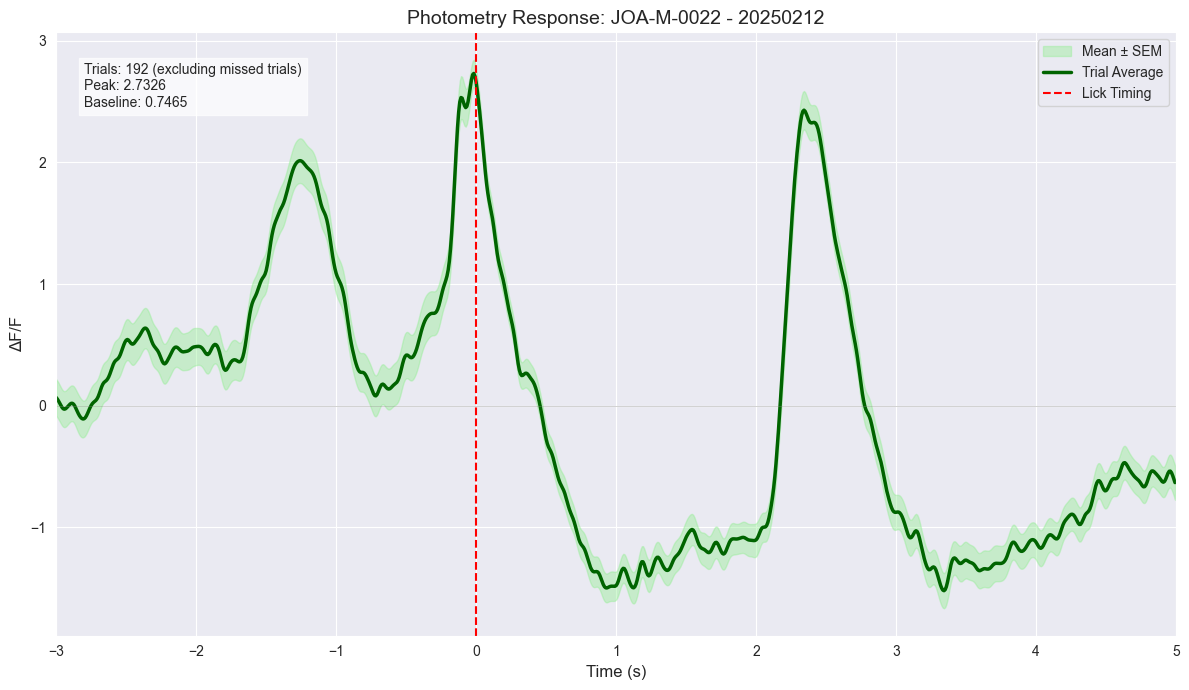

In [7]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0022", "20250212", show_heatmap=False, win_loss=False)

Analyzing pooled results for subject JOA-M-0022...
Loaded saved pooled results for JOA-M-0022
Saved figure for JOA-M-0022/pooled to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0022\pooled\pooled_results_winloss.png


<Figure size 1200x700 with 0 Axes>

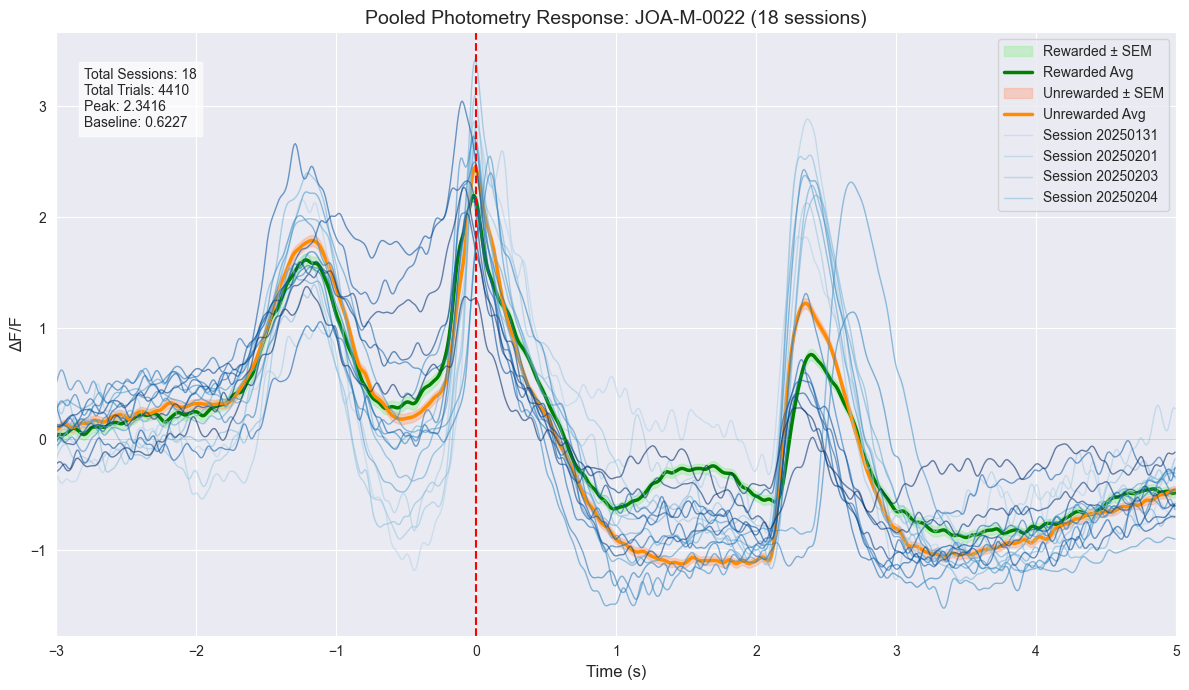

In [13]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0022", win_loss=True)
#22, 23, 24, 25, 26; 20

In [ ]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=True)

In [ ]:
select_and_visualize(show_heatmap=True, win_loss=True)

Loaded saved results for JOA-M-0020/20250303
Loaded saved results for JOA-M-0020/20250305

Average reward rates by quartile:
Quartile 1: 0.2384
Quartile 2: 0.3308
Quartile 3: 0.3864
Quartile 4: 0.4619
Saved figure for JOA-M-0020/20250305 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0020\20250305\reward_rate_quartiles.png


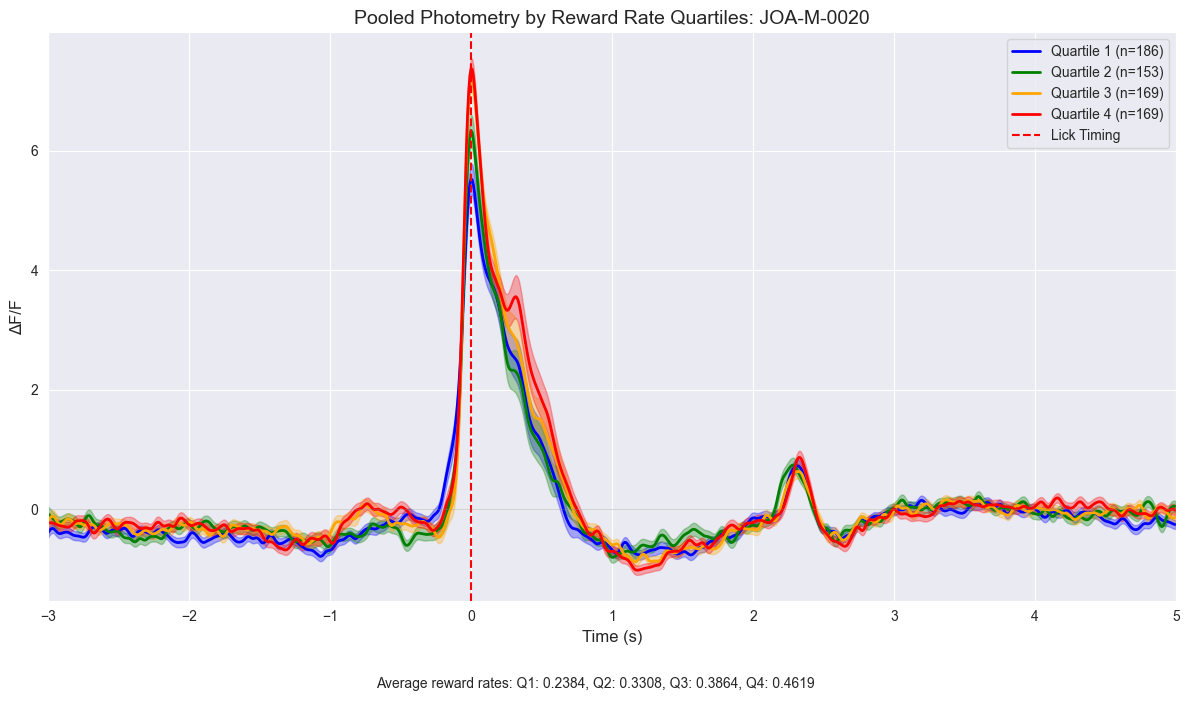

{'quartile_bins': array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3

In [2]:
analyze_reward_rate_quartiles("JOA-M-0020", win_loss=False)
#change window size to 20, then chuck 10 trials 
# for everything, chuck sessions with < 100 valid trials

Loaded saved results for JOA-M-0024/20250201
Loaded saved results for JOA-M-0024/20250204
Loaded saved results for JOA-M-0024/20250205
Loaded saved results for JOA-M-0024/20250206
Loaded saved results for JOA-M-0024/20250207
Loaded saved results for JOA-M-0024/20250208
Loaded saved results for JOA-M-0024/20250210
Loaded saved results for JOA-M-0024/20250211
Loaded saved results for JOA-M-0024/20250212
Loaded saved results for JOA-M-0024/20250214
Loaded saved results for JOA-M-0024/20250215
Loaded saved results for JOA-M-0024/20250217
Loaded saved results for JOA-M-0024/20250218
Loaded saved results for JOA-M-0024/20250226
Loaded saved results for JOA-M-0024/20250228
Loaded saved results for JOA-M-0024/20250303
Loaded saved results for JOA-M-0024/20250305

Average computer confidence by quartile:
Quartile 1: 1.0475
Quartile 2: 1.7746
Quartile 3: 3.1244
Quartile 4: 6.6090
Saved figure for JOA-M-0024/20250305 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\20250305\computer

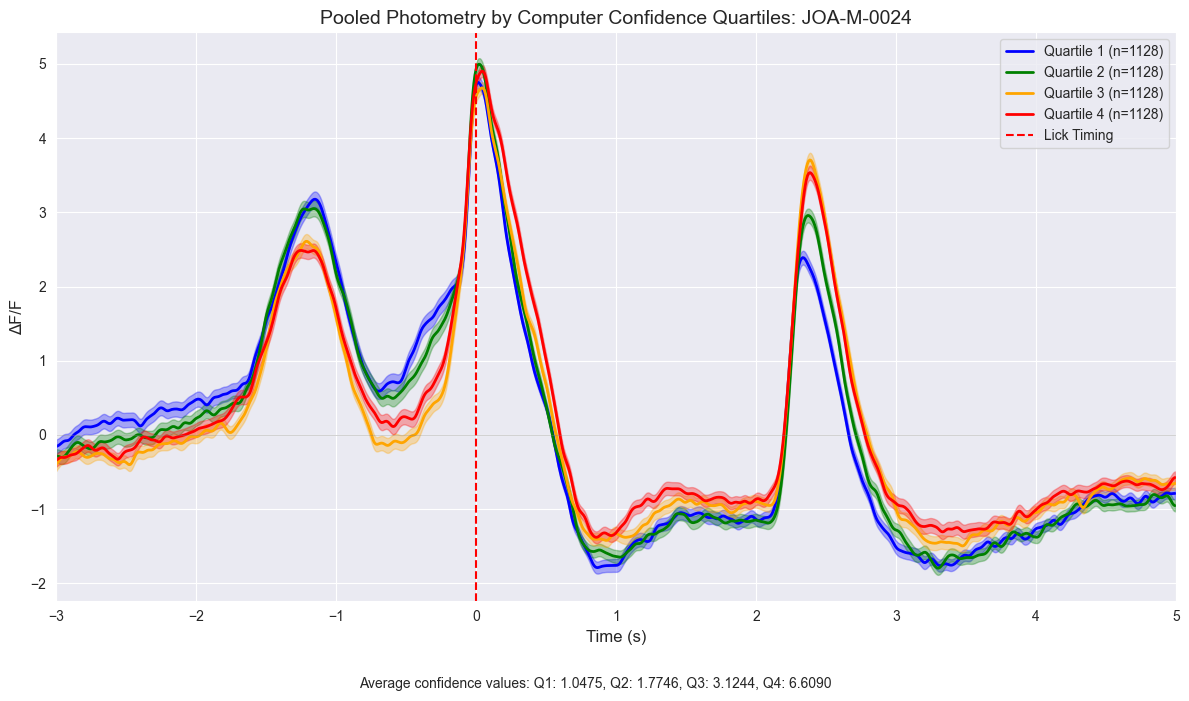

{'quartile_bins': array([nan, nan, nan, ...,  3.,  3.,  3.], shape=(4817,)),
 'confidence_rates': array([       nan,        nan,        nan, ..., 5.04900479, 5.66135399,
        5.67689326], shape=(4817,))}

In [3]:
analyze_comp_confidence_quartiles("JOA-M-0024", win_loss=False)

In [ ]:
analyze_session_win_loss_difference_gap("JOA-M-0024") 

Loaded saved results for JOA-M-0024/20250201
Loaded saved results for JOA-M-0024/20250204
Loaded saved results for JOA-M-0024/20250205
Loaded saved results for JOA-M-0024/20250206
Loaded saved results for JOA-M-0024/20250207
Loaded saved results for JOA-M-0024/20250208
Loaded saved results for JOA-M-0024/20250210
Loaded saved results for JOA-M-0024/20250211
Loaded saved results for JOA-M-0024/20250212
Loaded saved results for JOA-M-0024/20250214
Loaded saved results for JOA-M-0024/20250215
Loaded saved results for JOA-M-0024/20250217
Loaded saved results for JOA-M-0024/20250218
Loaded saved results for JOA-M-0024/20250226
Loaded saved results for JOA-M-0024/20250228
Loaded saved results for JOA-M-0024/20250303
Loaded saved results for JOA-M-0024/20250305
Loaded saved results for JOA-M-0024/20250201
Loaded saved results for JOA-M-0024/20250204
Loaded saved results for JOA-M-0024/20250205
Loaded saved results for JOA-M-0024/20250206
Loaded saved results for JOA-M-0024/20250207
Loaded sav

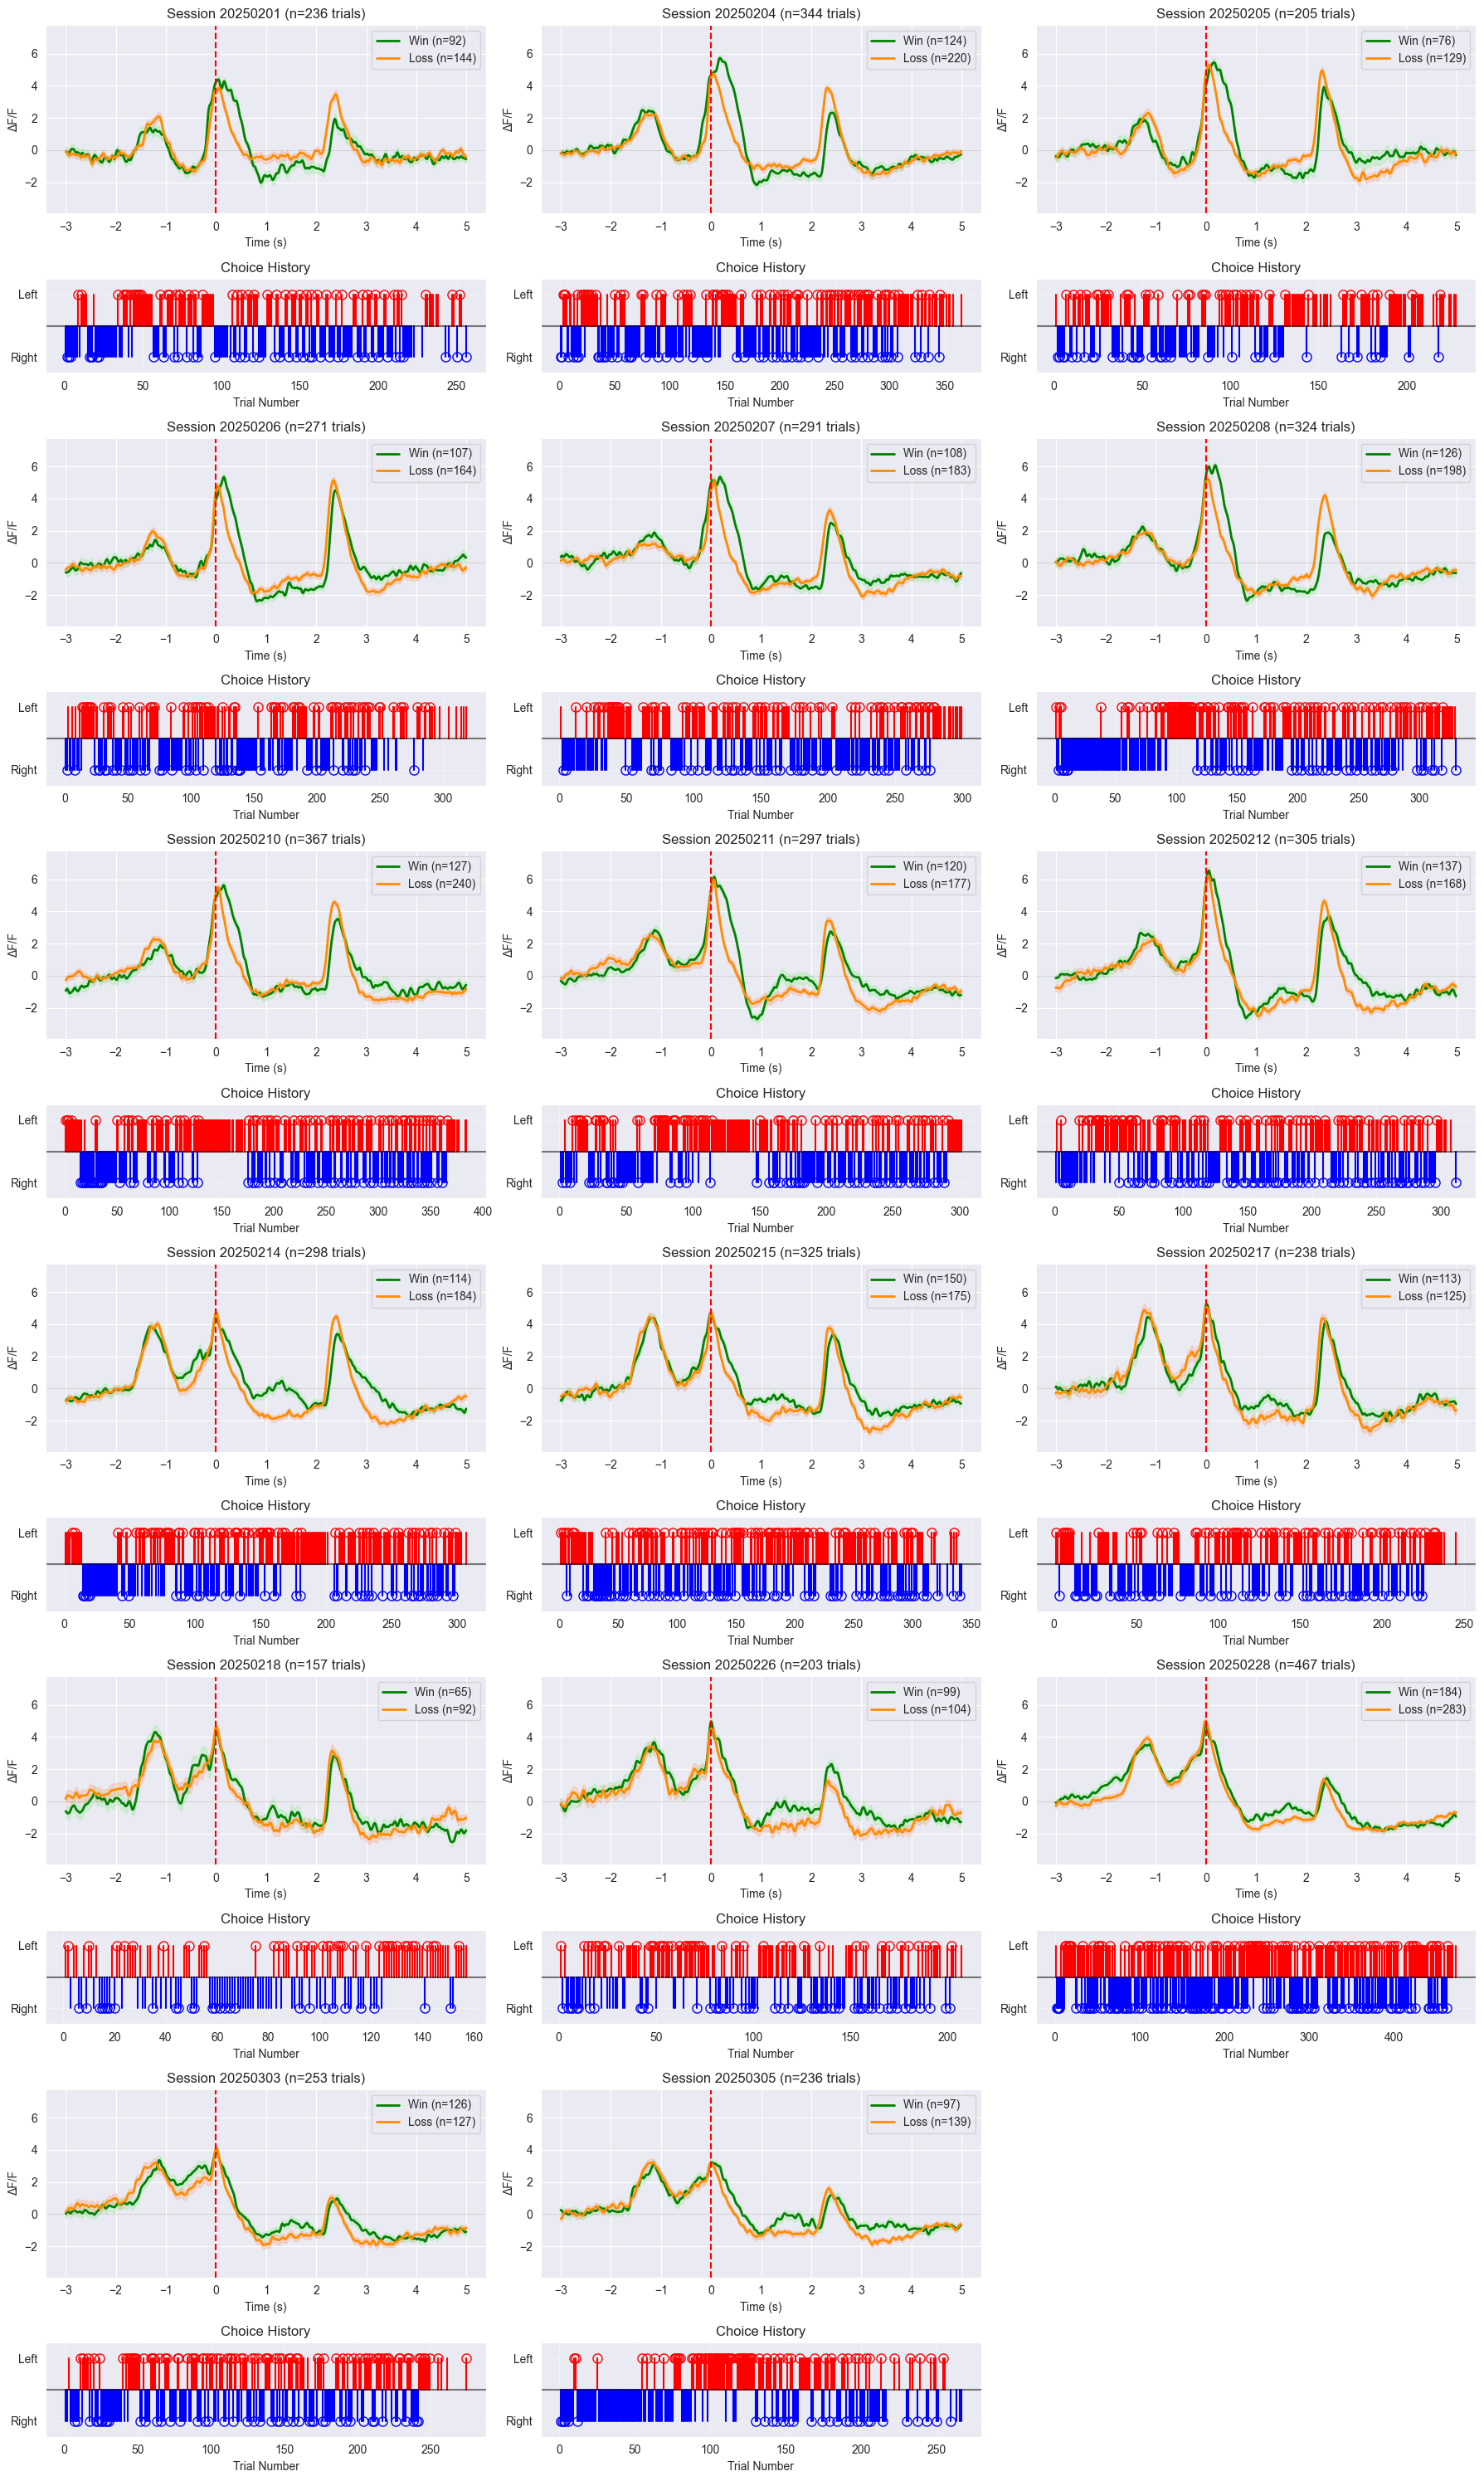

In [2]:
plot_per_session_win_loss("JOA-M-0024")

Processing JOA-M-0020/20250303...
Loaded saved results for JOA-M-0020/20250303
Processing JOA-M-0020/20250305...
Loaded saved results for JOA-M-0020/20250305
Saved figure for JOA-M-0020/pooled to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0020\pooled\previous_outcome_effect.png


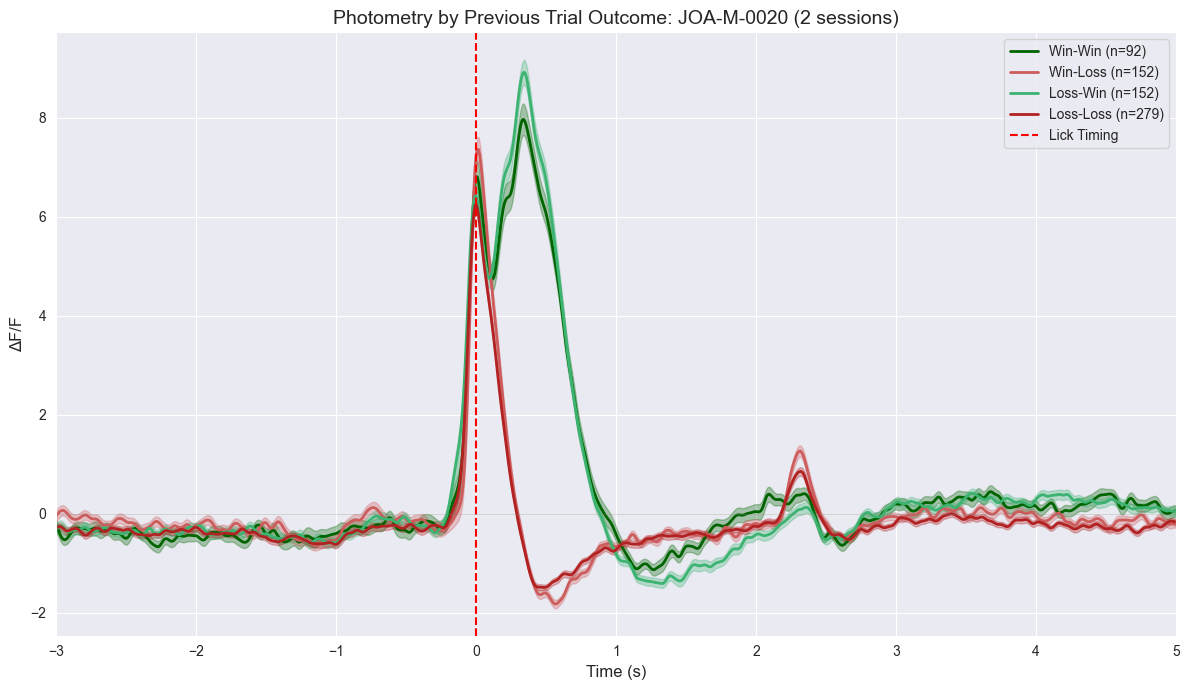

{'subject_id': 'JOA-M-0020',
 'session_dates': ['20250303', '20250305'],
 'time_axis': array([-3.        , -2.99166667, -2.98333333, -2.975     , -2.96666667,
        -2.95833333, -2.95      , -2.94166667, -2.93333333, -2.925     ,
        -2.91666667, -2.90833333, -2.9       , -2.89166667, -2.88333333,
        -2.875     , -2.86666667, -2.85833333, -2.85      , -2.84166667,
        -2.83333333, -2.825     , -2.81666667, -2.80833333, -2.8       ,
        -2.79166667, -2.78333333, -2.775     , -2.76666667, -2.75833333,
        -2.75      , -2.74166667, -2.73333333, -2.725     , -2.71666667,
        -2.70833333, -2.7       , -2.69166667, -2.68333333, -2.675     ,
        -2.66666667, -2.65833333, -2.65      , -2.64166667, -2.63333333,
        -2.625     , -2.61666667, -2.60833333, -2.6       , -2.59166667,
        -2.58333333, -2.575     , -2.56666667, -2.55833333, -2.55      ,
        -2.54166667, -2.53333333, -2.525     , -2.51666667, -2.50833333,
        -2.5       , -2.49166667, -2.4

In [7]:
analyze_previous_outcome_effect("JOA-M-0020")